In [234]:
from sentinelhub import SHConfig

config = SHConfig()
config.sh_client_id = 'sh-fe080851-d462-4304-9f4d-1b7fd7c7dc95'
config.sh_client_secret = 'XBnxUPfjs1duw9wmexDpoVmhTbY6piHw'
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'
config.sh_token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

In [235]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
from utils import plot_image

In [236]:
hyd_coords_wgs84 = (78.175278,17.192619,78.715668,17.643368)
resolution = 80
hyd_bbox = BBox(bbox=hyd_coords_wgs84, crs=CRS.WGS84)
hyd_size = bbox_to_dimensions(hyd_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {hyd_size} pixels")

Image shape at 80 m resolution: (726, 614) pixels


In [263]:
evalscript_1 = """
//VERSION=3
function setup() {
  return {
    input: ["NO2", "dataMask"],
    output: { bands: 4 },
  }
}

const minVal = 0.0
const maxVal = 0.000075
const diff = maxVal - minVal

const rainbowColors = [
  [minVal, [0, 0, 0.5]],
  [minVal + 0.125 * diff, [0, 0, 1]],
  [minVal + 0.375 * diff, [0, 1, 1]],
  [minVal + 0.625 * diff, [1, 1, 0]],
  [minVal + 0.875 * diff, [1, 0, 0]],
  [maxVal, [0.5, 0, 0]],
]

const viz = new ColorRampVisualizer(rainbowColors)

function evaluatePixel(sample) {
  var rgba = viz.process(sample.NO2)
  rgba.push(sample.dataMask)
  var maskValue = sample.dataMask; 
  return rgba
}
"""



request_true_color = SentinelHubRequest(
    evalscript=evalscript_1,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL5P.define_from(
                "s5pl2", service_url=config.sh_base_url
            ),
            time_interval=("2021-07-14", "2021-07-17"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=hyd_bbox,
    size=hyd_size,
    config=config,
)

In [264]:
image = request_true_color.get_data()[0]

In [265]:
print(np.shape(image))

(614, 726, 4)


In [266]:
print(image[0])

[[  0 153 255 255]
 [  0 153 255 255]
 [  0 153 255 255]
 ...
 [  0  43 255 255]
 [  0  43 255 255]
 [  0  43 255 255]]


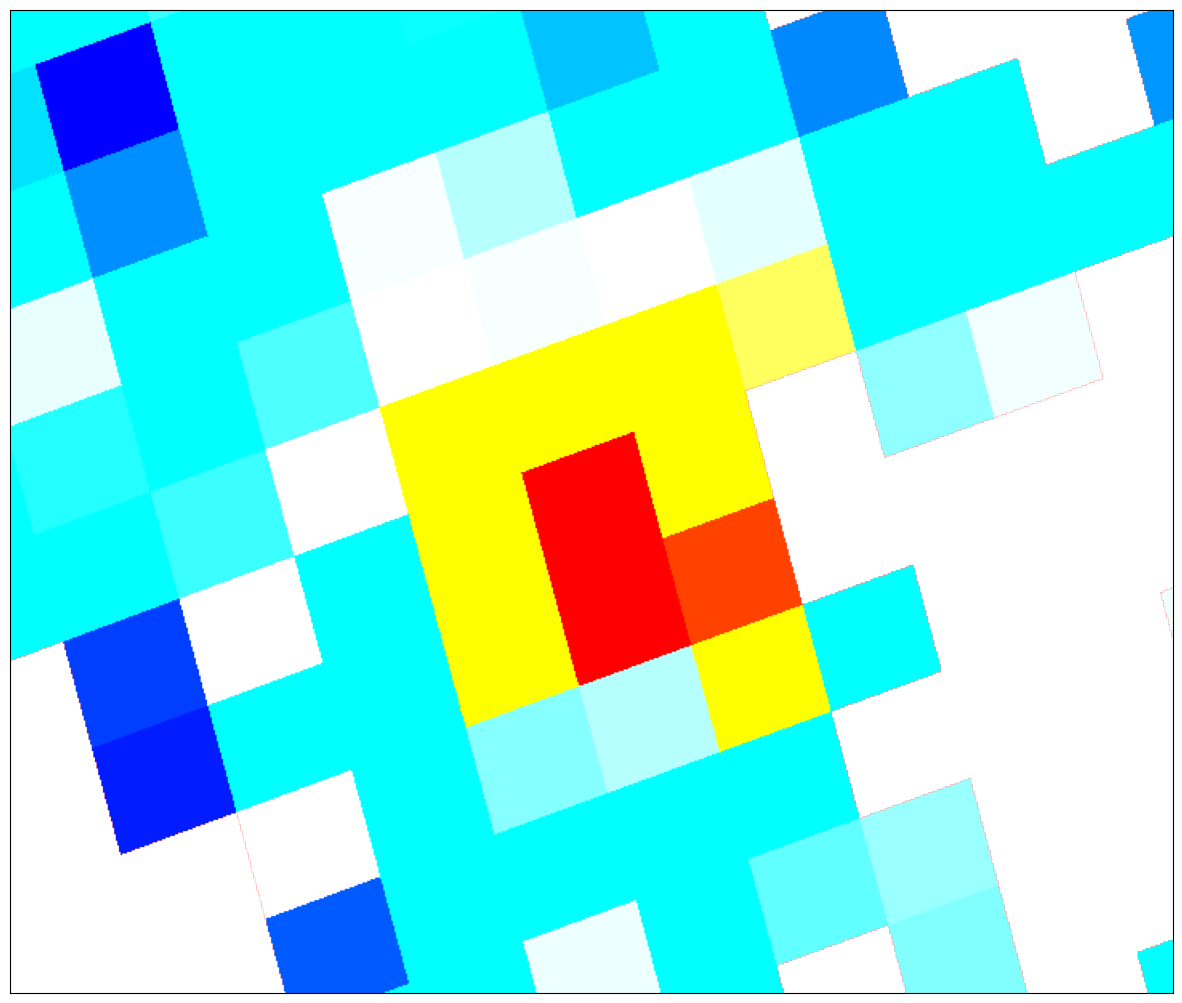

In [267]:
%matplotlib inline

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
from utils import plot_image

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

In [294]:
evalscript_3 = """
function setup() {
  return {
    input: ["NO2", "dataMask"],  // Ensure 'NO2' is included to avoid an empty product type error
    output: { bands: 3 },  // Use 3 bands for RGB output
  }
}

// Define a colormap: 0 -> white, 1 -> black
const colormap = [
  [0, [1, 1, 1]],  // white for dataMask = 0
  [1, [0, 0, 0]]   // black for dataMask = 1
];

const viz = new ColorRampVisualizer(colormap);

function evaluatePixel(sample) {
  // Apply the colormap based on dataMask value
  return viz.process(sample.dataMask);  // Invert the mask for correct colors
}
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_3,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL5P.define_from(
                "s5pl2", service_url=config.sh_base_url
            ),
            time_interval=("2021-07-14", "2021-07-17"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=hyd_bbox,
    size=hyd_size,
    config=config,
)

In [295]:
image = request_true_color.get_data()[0]

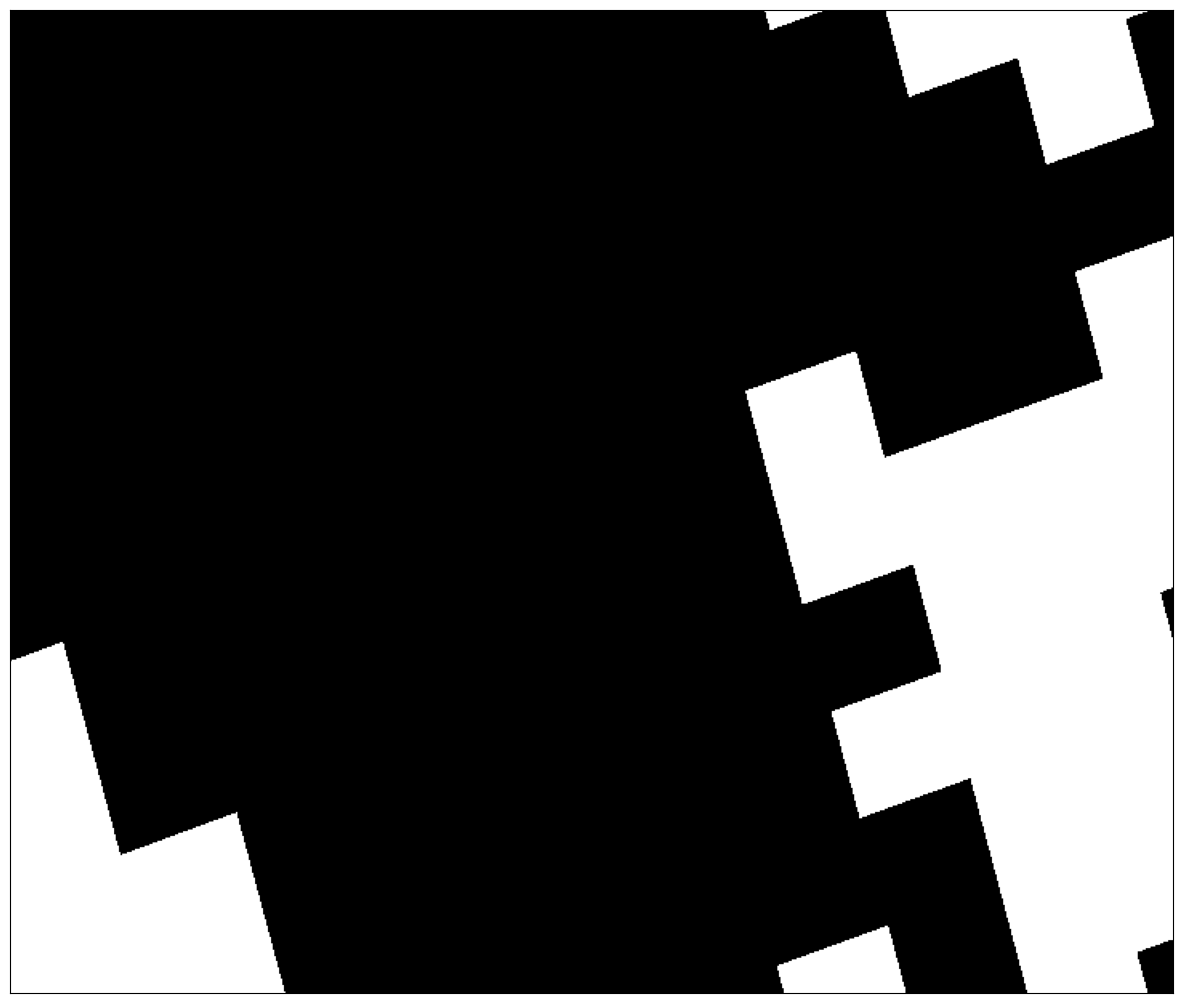

In [296]:
%matplotlib inline

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
from utils import plot_image

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

In [297]:
evalscript_2 = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_2,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A.define_from(
                "s2l2a", service_url=config.sh_base_url
            ),
            time_interval=("2021-07-14", "2021-07-17"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=hyd_bbox,
    size=hyd_size,
    config=config,
)

In [298]:
image = request_true_color.get_data()[0]


In [299]:
print(np.shape(image))

(614, 726, 3)


In [300]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 46  31  22]
  [ 22  25  16]
  [ 48  39  27]]

 [[255 255 255]
  [251 255 255]
  [241 255 255]
  ...
  [ 35  29  17]
  [ 31  28  19]
  [ 37  30  20]]

 [[255 255 255]
  [252 255 255]
  [243 255 255]
  ...
  [ 29  24  15]
  [ 14  20  11]
  [ 25  27  16]]

 ...

 [[124 130 141]
  [107 112 120]
  [ 99 102 108]
  ...
  [ 20  29  23]
  [ 29  33  27]
  [ 16  20  14]]

 [[123 128 138]
  [102 106 113]
  [ 90  95 104]
  ...
  [ 17  30  18]
  [ 25  32  22]
  [ 13  20  13]]

 [[ 77  79  82]
  [104 108 114]
  [118 123 132]
  ...
  [ 17  32  18]
  [ 21  33  19]
  [ 15  29  15]]]


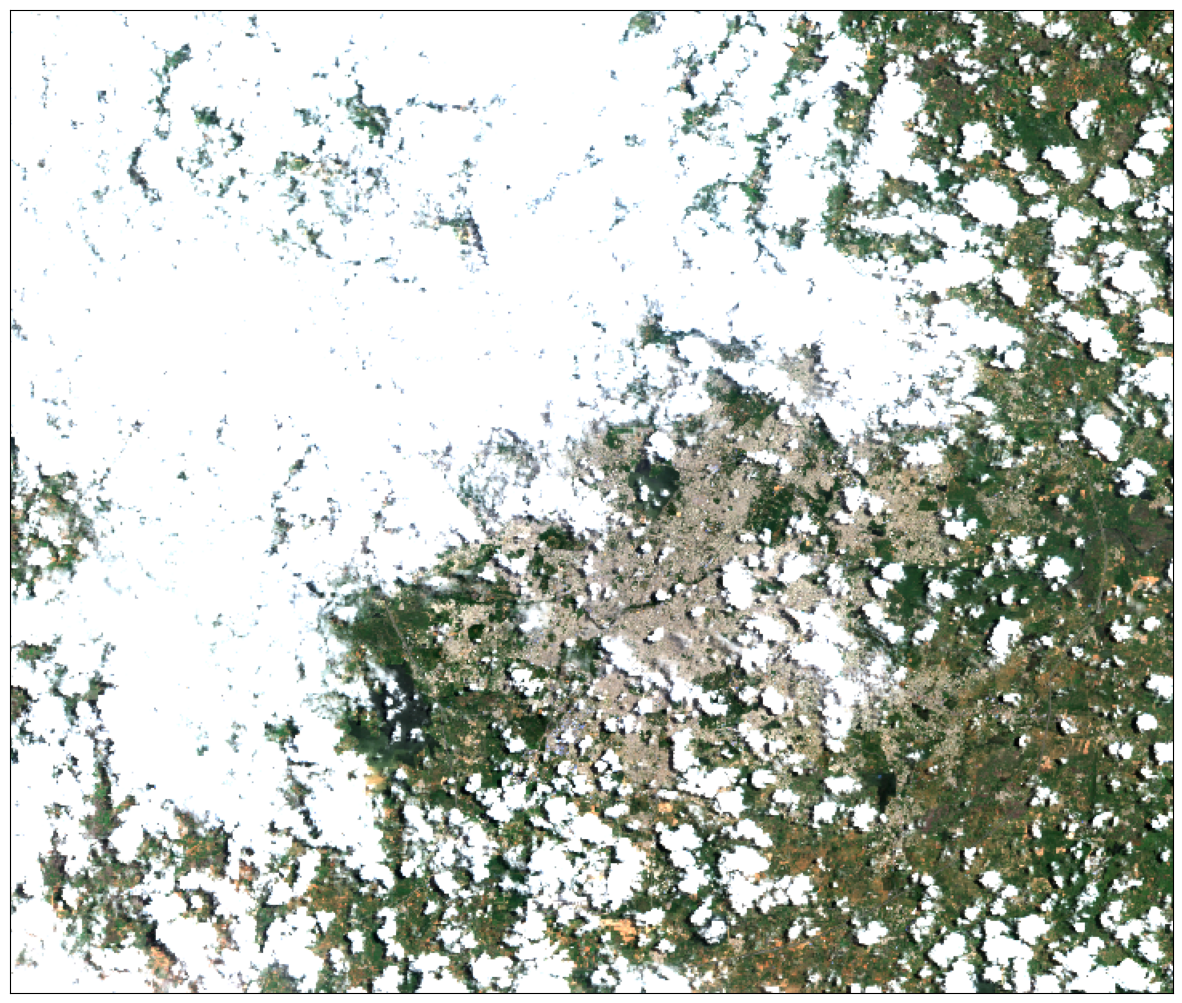

In [301]:
%matplotlib inline

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
from utils import plot_image

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))